# 1. Business Understanding

## High-Level Overview

Customer churn is one of the most pressing challenges for subscription-based businesses. In the telecommunications sector, churn directly impacts revenue, customer lifetime value, and operational efficiency. The aim of this project is to predict which customers are most likely to stop using the service (i.e., churn) using a machine learning model. This will allow the business to proactively retain high-risk customers through personalized interventions.


## Problem Statement

Telecom companies experience high customer turnover due to increased competition, service dissatisfaction, or pricing issues. Each customer lost means:
- Loss of recurring revenue
- Increased cost of acquiring new customers
- Possible damage to brand reputation if the churn results from a poor customer experience

The ability to predict churn enables timely, targeted action — such as retention offers or personalized outreach — to prevent customer loss.


## Stakeholders

- **Customer Retention Team**: Interested in identifying high-risk customers to launch retention campaigns.
- **Marketing Department**: Wants to segment and personalize campaigns for better ROI.
- **Executive Leadership**: Focused on minimizing churn rate to maintain market share and improve profitability.


## Project Objective

Develop a supervised machine learning model that:
- Accurately predicts whether a customer is likely to churn
- Identifies the key drivers of churn
- Can be integrated into existing customer management workflows for real-time insights


## Business Value

This model will empower the business to:
- Reduce customer churn and stabilize revenue
- Optimize resource allocation (target only high-risk customers)
- Design more effective and data-driven customer retention strategies
- Increase customer lifetime value (CLV)


## Why Machine Learning?

Machine learning is well-suited for solving the churn prediction problem because:
- It automates the detection of complex, non-linear patterns in large customer datasets
- It handles high-dimensional data better than manual analysis
- It can continuously learn and improve over time as new data comes in
- Churn is inherently a **binary classification** task — customers either churn (1) or do not (0) — making it ideal for classification algorithms

Using ML will enable predictive decision-making that goes beyond descriptive analytics.


# 2. Data Understanding

A critical first step in the data science workflow is to understand the structure, content, and potential quality issues within the dataset. This helps to identify necessary cleaning steps and informs modeling decisions.

We will begin by loading the dataset and performing an initial preview.

---

## 2.1 Load and Preview Data

We will load the dataset into a pandas DataFrame and preview the first few rows to get a sense of the variables available, the structure of the data, and any immediate data quality issues.


In [5]:
# Import libraries

import pandas as pd

# Load the dataset

df = pd.read_csv('../data/bigml_59c28831336c6604c800002a.csv')

# Preview the first 5 rows

df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 2.2 Dataset Shape

We begin by checking the dimensions of the dataset to understand how many records (rows) and attributes (columns) we’re working with.


In [7]:
# Shape of the dataset

print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


The dataset contains 3333 rows and 21 columns.


## 2.3 Data Types and Structure

We inspect data types and the number of non-null entries to identify potential null values, understand feature types (numeric vs. categorical), and assess overall data structure.


In [8]:
# Info about data types and non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## 2.4 Missing Values

Missing values can negatively affect model performance. Here, we calculate the total and percentage of missing values in each column.


In [9]:
# Total and percentage of missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing, 'Percentage (%)': missing_percent})
missing_summary[missing_summary['Missing Values'] > 0]


,Missing Values,Percentage (%)


## 2.5 Unique Values and Duplicate Records

We now explore the number of unique values in each column to identify potential categorical features. Additionally, we check for duplicate rows which may introduce bias or redundancy.


In [10]:
# Unique values per column
unique_vals = df.nunique().sort_values()
print(unique_vals)

# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")


churn                        2
international plan           2
voice mail plan              2
area code                    3
customer service calls      10
total intl calls            21
number vmail messages       46
state                       51
total day calls            119
total night calls          120
total eve calls            123
total intl minutes         162
total intl charge          162
account length             212
total night charge         933
total eve charge          1440
total night minutes       1591
total eve minutes         1611
total day charge          1667
total day minutes         1667
phone number              3333
dtype: int64
Number of duplicate rows: 0


# 3. Data Preparation

## 3.1 Clean Column Names

To avoid syntax issues during modeling and analysis, we clean the column names by:
- Stripping whitespace
- Lowercasing all names
- Replacing spaces with underscores


In [11]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns


Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

## 3.2 Drop Unnecessary Columns

We drop non-informative or redundant columns such as `phone_number`, which is a unique identifier, and optionally `state` or `area_code` to reduce dimensionality.


In [12]:
# Drop non-informative columns
df.drop(['phone_number'], axis=1, inplace=True)


## 3.3 Encode Target Variable

Machine learning models require numeric inputs. Therefore, we convert the target column `churn` from string values ('Yes'/'No') to binary (1 for churn, 0 for not churn).


In [14]:
# Confirm current values in target column
df['churn'].unique()


array([False,  True])

In [15]:
# Map 'Yes' to 1 and 'No' to 0
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})


In [16]:
# Double-check conversion
df['churn'].value_counts()


Series([], Name: churn, dtype: int64)

## 3.4 Encode Categorical Features

To make categorical variables usable for modeling, we apply one-hot encoding using `pd.get_dummies()`. This transforms each category into a new binary column while avoiding multicollinearity by dropping the first category per feature.



In [36]:
# Get list of categorical columns (excluding the already encoded 'churn')
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# One-hot encode with drop_first=True to avoid dummy variable trap
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Confirm new shape
print(f"Encoded dataset has {df_encoded.shape[1]} features.")
df_encoded.head()


Encoded dataset has 3401 features.


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,phone number_422-5874,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0


## 3.5 Feature Scaling

Feature scaling ensures that all numerical features contribute equally to the model. It’s especially important for distance-based or gradient-based models. We'll use `StandardScaler` to normalize the feature values to a standard distribution.


In [37]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform features
X_scaled = scaler.fit_transform(X)


## Step 4: Exploratory Data Analysis (EDA)
- EDA helps us understand relationships, detect patterns, and spot anomalies in the data before modeling.

### 4.1 Summary Statistics

In [38]:
# Basic summary statistics
df_encoded.describe(include='all')


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,phone number_422-5874,phone number_422-6685,phone number_422-6690,phone number_422-7728,phone number_422-8268,phone number_422-8333,phone number_422-8344,phone number_422-9964,international plan_yes,voice mail plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,...,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.096910,0.276628
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,...,0.017321,0.017321,0.017321,0.017321,0.017321,0.017321,0.017321,0.017321,0.295879,0.447398
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


### 4.2 Churn Distribution

Understanding how many customers churned versus those who stayed is important for two main reasons:

#### 1. Imbalanced Classes
If the classes are highly imbalanced (e.g., 90% of customers stayed and only 10% churned), traditional classification models may perform poorly. In such cases, we may need to:

- Apply **stratified sampling** when splitting data
- Use **resampling techniques** (over/under-sampling)
- Choose **evaluation metrics** that work well with imbalanced data (e.g., F1-score, AUC-ROC)

#### 2. Business Insight
Churn distribution provides key insights into the business health. A high churn rate can signal dissatisfaction, competitive threats, or product issues, prompting immediate attention from business leaders.

#### Churn Count & Percentage Visualization
We will visualize the distribution using a bar plot and also print the counts and percentages to better understand the class balance.


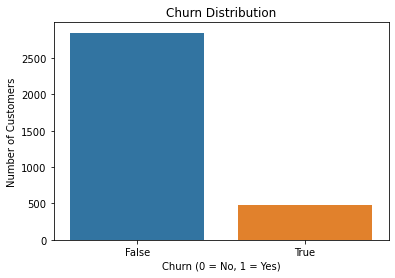

Churn Counts:
 False    2850
True      483
Name: churn, dtype: int64

Churn Percentage:
 False    85.51
True     14.49
Name: churn, dtype: float64


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df_encoded)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()

# Value counts and percentages
churn_counts = df_encoded['churn'].value_counts()
churn_percent = df_encoded['churn'].value_counts(normalize=True) * 100

print("Churn Counts:\n", churn_counts)
print("\nChurn Percentage:\n", churn_percent.round(2))
